In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

* 1 - represent mean
* 2 - represent standard error
* 3 - represent worst value

These features describe characteristics of a cell nucleus extracted from breast mass images. Let’s break them down:

* Radius – Measures the average distance from the center of the nucleus to its outer boundary (perimeter).
* Texture – Represents the variation in gray-scale intensity, helping distinguish smooth from rough textures.
* Perimeter – The total boundary length of the nucleus.
* Area – The total size (surface area) of the nucleus.
* Smoothness – Measures how smooth or irregular the nucleus boundary is (lower values = smoother).
* Compactness – A shape-based feature that relates the perimeter to the area. Higher compactness means a more irregular shape.
* Concavity – Describes how deeply concave (inward curved) the nucleus edges are.
* Concave points – Counts how many concave (inward) sections exist on the nucleus boundary.
* Symmetry – Compares how symmetric the nucleus shape is.
* Fractal dimension – A mathematical measure of complexity in the shape, similar to how a coastline appears more detailed at different scales.

These features help the model differentiate between benign (smooth, round, symmetrical) and malignant (irregular, jagged, asymmetric) tumors.

In [2]:
# Read data
df = pd.read_csv("breast-cancer.csv")
df

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842302.0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517.0,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903.0,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301.0,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402.0,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,926954.0,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241.0,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751.0,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039
569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(571, 32)

In [4]:
df.head()

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842302.0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517.0,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903.0,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301.0,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402.0,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df.tail()

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
566,926954.0,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241.0,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751.0,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039
569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.Diagnosis.value_counts()

,count
Diagnosis,
B,357
M,212


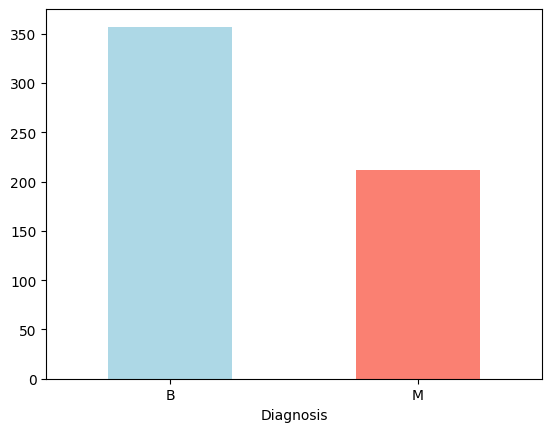

In [7]:
df.Diagnosis.value_counts().plot.bar(color = ["lightblue", "salmon"])
plt.xticks(rotation = 0)
plt.show();

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  569 non-null    float64
 1   Diagnosis           569 non-null    object 
 2   radius1             569 non-null    float64
 3   texture1            569 non-null    float64
 4   perimeter1          569 non-null    float64
 5   area1               569 non-null    float64
 6   smoothness1         569 non-null    float64
 7   compactness1        569 non-null    float64
 8   concavity1          569 non-null    float64
 9   concave_points1     569 non-null    float64
 10  symmetry1           569 non-null    float64
 11  fractal_dimension1  569 non-null    float64
 12  radius2             569 non-null    float64
 13  texture2            569 non-null    float64
 14  perimeter2          569 non-null    float64
 15  area2               569 non-null    float64
 16  smoothne

In [9]:
df.isna().sum()

,0
ID,2
Diagnosis,2
radius1,2
texture1,2
perimeter1,2
area1,2
smoothness1,2
compactness1,2
concavity1,2
concave_points1,2


In [10]:
df['Diagnosis'] = df['Diagnosis'].replace({'M': 1, 'B': 0}).fillna(0).astype(int)

<ipython-input-10-f31d4a245280>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Diagnosis'] = df['Diagnosis'].replace({'M': 1, 'B': 0}).fillna(0).astype(int)


In [11]:
bc = df.dropna()
bc.tail()

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
564,926424.0,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682.0,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954.0,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241.0,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751.0,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


* Smoothness – Measures how smooth or irregular the nucleus boundary is (lower values = smoother).

* Compactness – A shape-based feature that relates the perimeter to the area. Higher compactness means a more irregular shape.

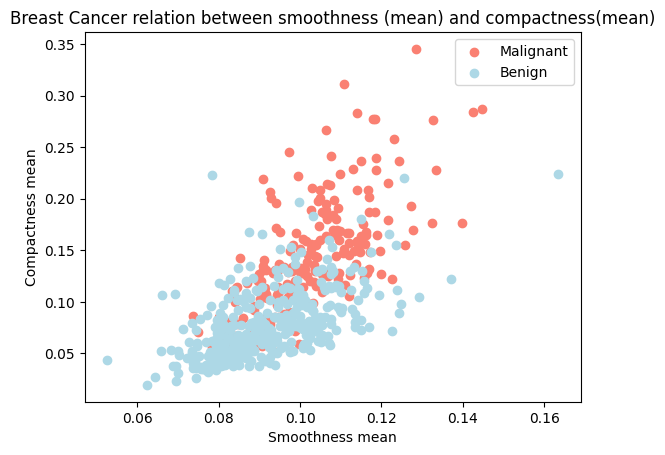

In [12]:
plt.scatter(bc.smoothness1[bc.Diagnosis == 1],
           bc.compactness1[bc.Diagnosis == 1],
           c = ["salmon"])

plt.scatter(bc.smoothness1[bc.Diagnosis == 0],
            bc.compactness1[bc.Diagnosis == 0],
            c = ["lightblue"])
plt.title("Breast Cancer relation between smoothness (mean) and compactness(mean)")
plt.xlabel("Smoothness mean")
plt.ylabel("Compactness mean")
plt.legend(["Malignant", "Benign"])
plt.savefig("bc1.png", dpi=300, bbox_inches='tight')  # Save first
plt.show()  # Then display it


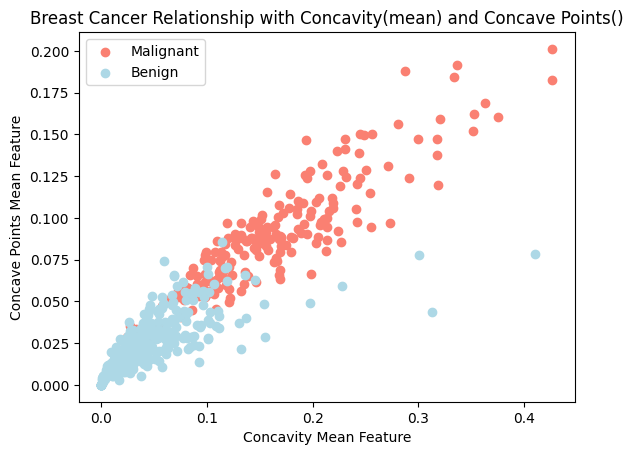

In [13]:
import matplotlib.pyplot as plt

# Scatter plot
plt.scatter(bc.concavity1[bc.Diagnosis == 1],
            bc.concave_points1[bc.Diagnosis == 1],
            c="salmon", label="Malignant")

plt.scatter(bc.concavity1[bc.Diagnosis == 0],
            bc.concave_points1[bc.Diagnosis == 0],
            c="lightblue", label="Benign")

# Labels & title
plt.title("Breast Cancer Relationship with Concavity(mean) and Concave Points()")
plt.xlabel("Concavity Mean Feature")
plt.ylabel("Concave Points Mean Feature")

# Legend
plt.legend()

# Show plot
plt.savefig("bc2.png", dpi=300, bbox_inches='tight')  # Save first
plt.show()  # Then display it
  # Then display it


Note: The higher the compactness, the higher the smoothness (less smooth) which means higher risk of having `malignant`

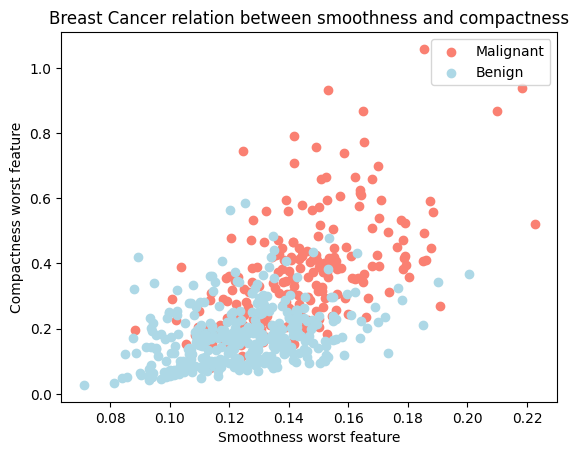

In [14]:
plt.scatter(bc.smoothness3[bc.Diagnosis == 1],
            bc.compactness3[bc.Diagnosis == 1],
            c = ["salmon"])

plt.scatter(bc.smoothness3[bc.Diagnosis == 0],
            bc.compactness3[bc.Diagnosis == 0],
            c = ["lightblue"])
plt.title("Breast Cancer relation between smoothness and compactness")
plt.xlabel("Smoothness worst feature")
plt.ylabel("Compactness worst feature")
plt.legend(["Malignant", "Benign"])
plt.show();

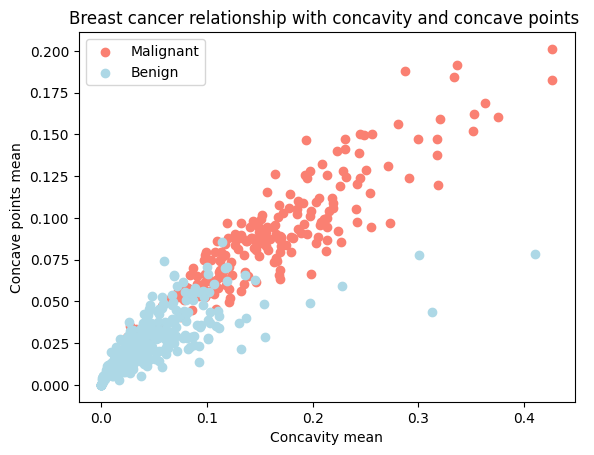

In [15]:
plt.scatter(bc.concavity1[bc.Diagnosis == 1],
            bc.concave_points1[bc.Diagnosis == 1],
            c = ["salmon"])

plt.scatter(bc.concavity1[bc.Diagnosis == 0],
            bc.concave_points1[bc.Diagnosis == 0],
            c = ["lightblue"])

plt.title("Breast cancer relationship with concavity and concave points ")
plt.xlabel("Concavity mean")
plt.ylabel("Concave points mean")
plt.legend(["Malignant", "Benign"])
plt.show();

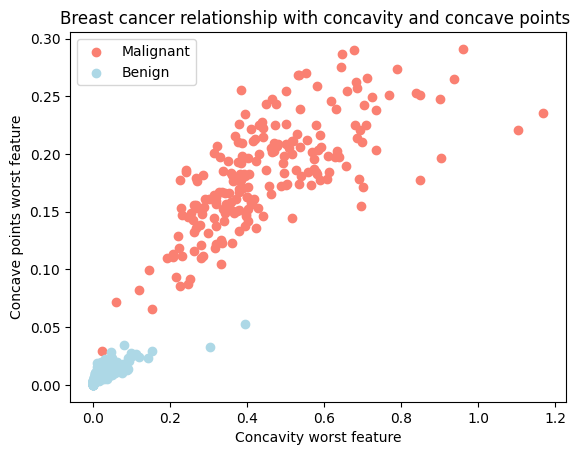

In [16]:
plt.scatter(bc.concavity3[bc.Diagnosis == 1],
            bc.concave_points3[bc.Diagnosis == 1],
            c = ["salmon"])

plt.scatter(bc.concavity2[bc.Diagnosis == 0],
            bc.concave_points2[bc.Diagnosis == 0],
            c = ["lightblue"])

plt.title("Breast cancer relationship with concavity and concave points ")
plt.xlabel("Concavity worst feature")
plt.ylabel("Concave points worst feature")
plt.legend(["Malignant", "Benign"])
plt.show();

In [17]:
# Make a correlation matrix
bc.corr()

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
ID,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
Diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius1,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture1,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter1,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area1,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness1,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness1,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity1,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave_points1,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


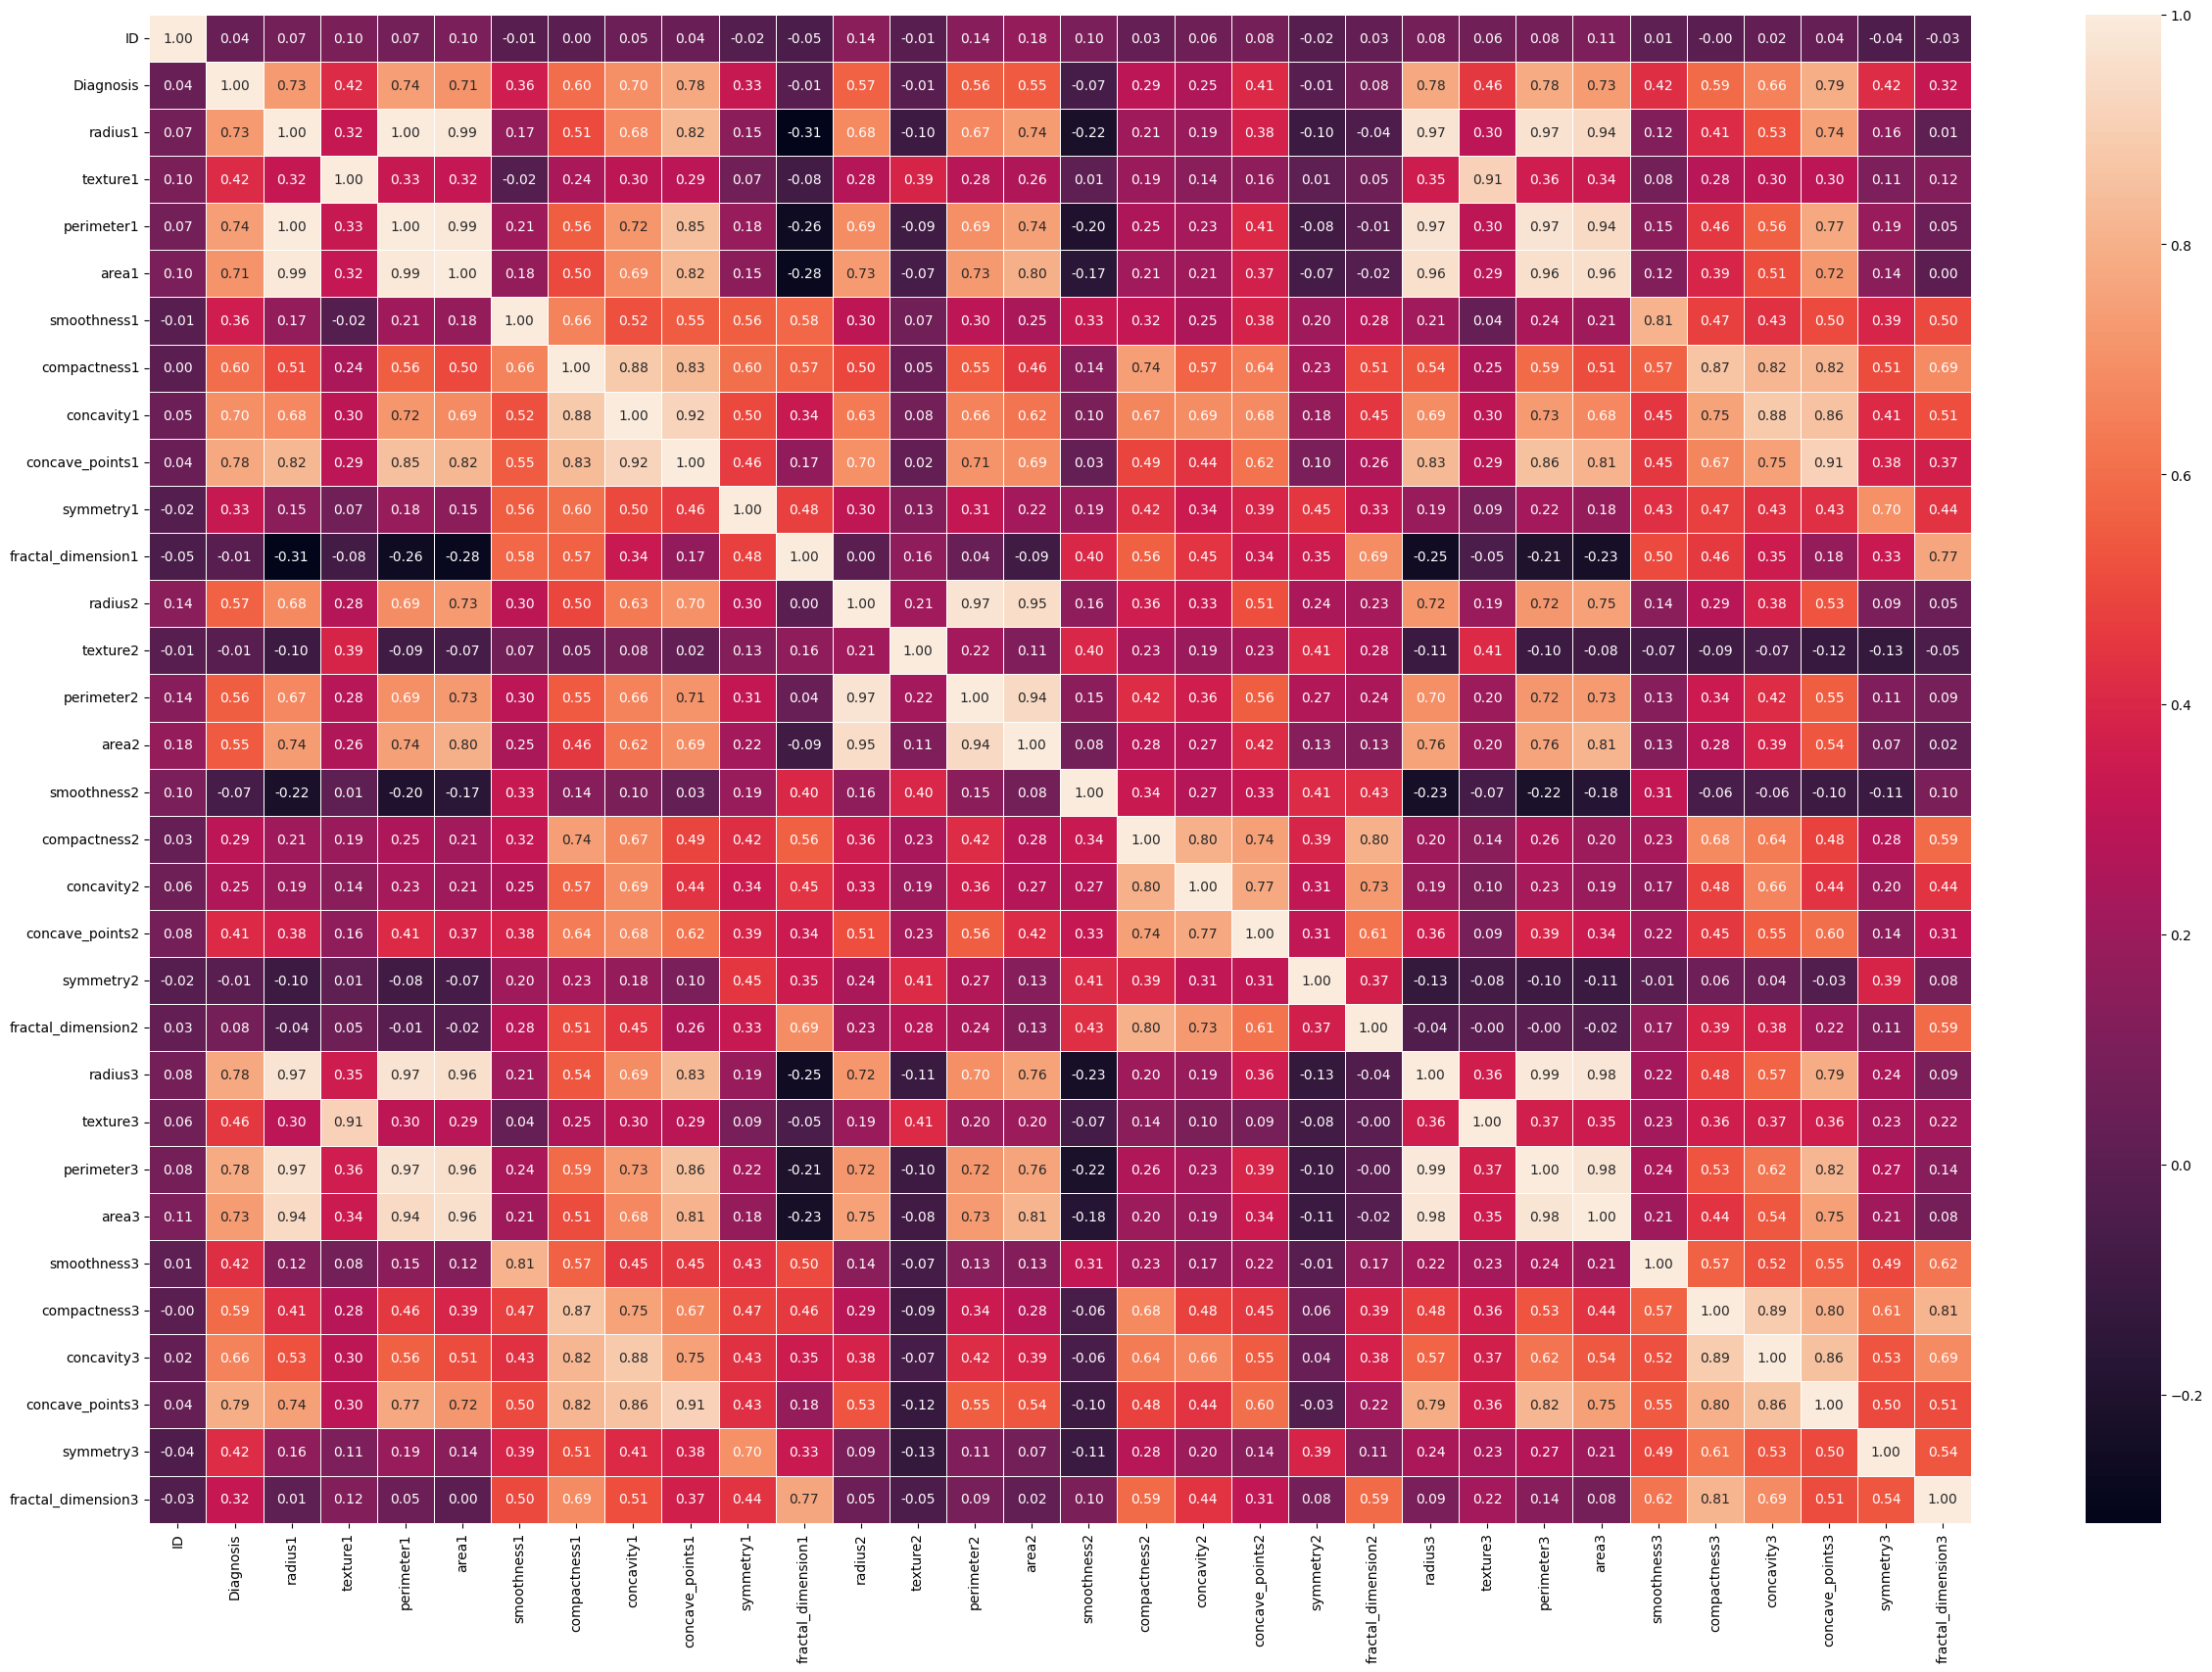

In [18]:
corr_matrix = bc.corr()
fig, ax = plt.subplots( figsize= (30, 20))
ax = sns.heatmap(corr_matrix,
                 annot =True,
                 linewidth = 0.5,
                 fmt = ".2f")
plt.show();

In [19]:
#split into x and y

X = bc.drop(["Diagnosis", "ID"], axis = 1)
y = bc["Diagnosis"]

In [20]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2)

In [21]:
X_train

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
68,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,0.08046,...,10.310,22.65,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750
181,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,0.07398,...,26.680,33.48,176.50,2089.0,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840
63,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,0.06963,...,10.010,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490
248,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,...,12.250,35.19,77.98,455.7,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147
60,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960,...,11.020,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,0.08980,...,9.733,15.67,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840
106,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,0.06520,...,13.140,29.26,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097
270,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,0.05376,...,14.910,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120
435,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,0.06544,...,17.040,30.80,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550


In [22]:
y_test

,Diagnosis
204,0
70,1
131,1
431,0
540,0
...,...
486,0
75,1
249,0
238,0


In [23]:
models = {
    "Logistic Regression" : LogisticRegression(),
    "KNN" : KNeighborsClassifier(),
    "Random Forest" : RandomForestClassifier(),
    "Gradient Boosting" : GradientBoostingClassifier(),
    "Xgboost" : XGBClassifier()
}

def fit_and_score (models, X_train, X_test, y_train, y_test):
    model_scores = {}

    np.random.seed(42)

    for name, model in models.items():
        model.fit(X_train, y_train)

        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [24]:
fit_and_score(models , X_train, X_test, y_train, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.956140350877193,
 'KNN': 0.956140350877193,
 'Random Forest': 0.9649122807017544,
 'Gradient Boosting': 0.956140350877193,
 'Xgboost': 0.956140350877193}

### Using RandomisedSearchCV for hyperparameter tuning of Random Forest since it has the highest accuracy

In [25]:
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [26]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions = rf_grid,
                           cv = 5,
                           n_iter = 20,
                           verbose = True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [27]:
rs_rf.best_params_

{'n_estimators': np.int64(310),
 'min_samples_split': np.int64(12),
 'min_samples_leaf': np.int64(5),
 'max_depth': None}

In [28]:
rs_rf.score(X_test, y_test)

0.9649122807017544

### RandomizedSearchCV for Logistic Regression

In [29]:
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

In [30]:

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions = log_reg_grid,
                                cv = 5,
                                n_iter = 20,
                                verbose = True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [31]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(78.47599703514607)}

In [32]:
rs_log_reg.score(X_test, y_test)

0.956140350877193

### Hyperparameter tuning BY HAND for KNN

In [33]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of different values for n_neighnors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbbors
for i in neighbors:
    knn.set_params(n_neighbors = i)

    # Fit the algorithm
    knn.fit(X_train, y_train)

    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))

    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [34]:
test_scores

[0.9298245614035088,
 0.9385964912280702,
 0.9298245614035088,
 0.9473684210526315,
 0.956140350877193,
 0.9385964912280702,
 0.956140350877193,
 0.956140350877193,
 0.956140350877193,
 0.9649122807017544,
 0.9824561403508771,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9649122807017544,
 0.9649122807017544,
 0.9649122807017544,
 0.9649122807017544,
 0.9649122807017544,
 0.9649122807017544]

In [35]:
train_scores

[1.0,
 0.9428571428571428,
 0.9494505494505494,
 0.9406593406593406,
 0.9406593406593406,
 0.9362637362637363,
 0.9406593406593406,
 0.9318681318681319,
 0.9318681318681319,
 0.9274725274725275,
 0.9318681318681319,
 0.9230769230769231,
 0.9296703296703297,
 0.9252747252747253,
 0.9230769230769231,
 0.9230769230769231,
 0.9230769230769231,
 0.9208791208791208,
 0.9208791208791208,
 0.9208791208791208]

### Hyperparameter tuning BY HAND for GradientBoostingClassifier

In [36]:
clf2 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(X_train, y_train)
clf2.score(X_test, y_test)

0.9649122807017544

### Hyperparameter tuning using GridSearchCV for Logistic regression

In [37]:
# Different hyperparameter for our LogisticRegression model
np.random.seed(42)
log_reg_grid = {"C": np.logspace(-4, 4, 40),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid = log_reg_grid,
                          cv = 5,
                          verbose = True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.60371874e-04, 2.57191381e-04, 4.12462638e-04,
       6.61474064e-04, 1.06081836e-03, 1.70125428e-03, 2.72833338e-03,
       4.37547938e-03, 7.01703829e-03, 1.12533558e-02, 1.80472177e-02,
       2.89426612e-02, 4.64158883e-02, 7.44380301e-02, 1.19377664e-01,
       1.91448198e-01, 3.07029063e-01, 4.923882...652287e-01,
       1.26638017e+00, 2.03091762e+00, 3.25702066e+00, 5.22334507e+00,
       8.37677640e+00, 1.34339933e+01, 2.15443469e+01, 3.45510729e+01,
       5.54102033e+01, 8.88623816e+01, 1.42510267e+02, 2.28546386e+02,
       3.66524124e+02, 5.87801607e+02, 9.42668455e+02, 1.51177507e+03,
       2.42446202e+03, 3.88815518e+03, 6.23550734e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [38]:
gs_log_reg.score(X_test, y_test)

0.9649122807017544

In [39]:
rf_grid = {"n_estimators": np.arange(1, 10, 2),
           "max_depth": [None, 3],
           "min_samples_split": np.arange(2, 10, 2),
           "min_samples_leaf": np.arange(1, 10, 2)}

rs_grid = GridSearchCV(RandomForestClassifier(),
                       param_grid = rf_grid,
                       cv = 5,
                       verbose = True)
rs_grid.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 3],
                         'min_samples_leaf': array([1, 3, 5, 7, 9]),
                         'min_samples_split': array([2, 4, 6, 8]),
                         'n_estimators': array([1, 3, 5, 7, 9])},
             verbose=True)

In [40]:
rs_grid.score(X_test, y_test)

0.9736842105263158

### Evaluating the machine learning model beyond accuracy

* ROC and AUC curve
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

In [41]:
y_preds = rs_log_reg.predict(X_test)

In [42]:
y_preds

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1])

In [43]:
y_test

,Diagnosis
204,0
70,1
131,1
431,0
540,0
...,...
486,0
75,1
249,0
238,0


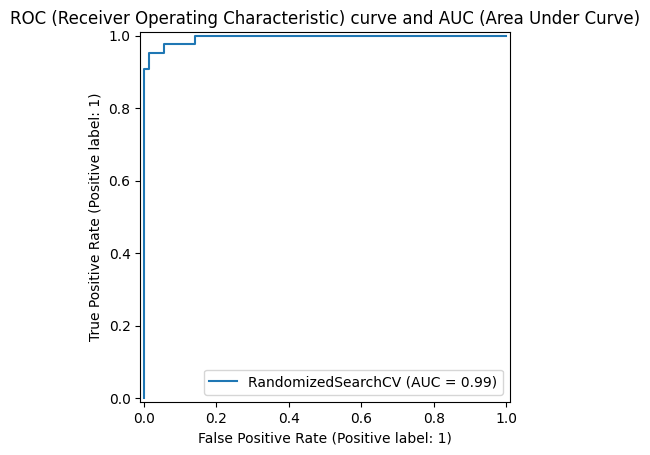

In [44]:
# Plot ROC curve and calculate AUC metric
RocCurveDisplay.from_estimator(rs_log_reg, X_test, y_test)
plt.title("ROC (Receiver Operating Characteristic) curve and AUC (Area Under Curve)")
plt.savefig("bc3.png", dpi=300, bbox_inches='tight')  # Save first
plt.show()  # Then display it


In [45]:
# Confusion matrix
confusion_matrix(y_test, y_preds)

array([[70,  1],
       [ 4, 39]])

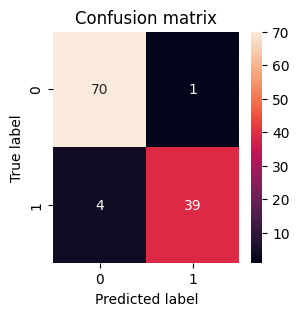

In [46]:
# Making the confusion matrix visual
def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot = True,
                     cbar = True)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.title("Confusion matrix")
    plt.savefig("bc4.png", dpi=300, bbox_inches='tight')  # Save first
    plt.show()  # Then display it


plot_conf_mat(y_test, y_preds)

In [47]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [48]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(78.47599703514607)}

In [49]:
clf = LogisticRegression(solver = 'liblinear',
                         C = np.float64(3792.690190732246))

In [50]:
metrics = {
    "cv_acc" : "accuracy",
    "cv_precision" : "precision",
    "cv_recall" : "recall",
    "cv_f1" : "f1"
}

def cross_val(model, x, y, cv):
    metric_result={}
    for name, scoring in metrics.items():
        function = cross_val_score(model,
                                   x,
                                   y,
                                   cv = cv,
                                   scoring = scoring)
        metric_result[name] = np.mean(function)
    return metric_result

In [51]:
cross_val(clf, X, y, 5)

{'cv_acc': np.float64(0.9508306163639186),
 'cv_precision': np.float64(0.9472594459803763),
 'cv_recall': np.float64(0.920265780730897),
 'cv_f1': np.float64(0.9328519255360502)}

### Feature Importance

In [52]:
clf = LogisticRegression(solver = 'liblinear',
                         C = np.float64(3792.690190732246))

In [53]:
clf.fit(X_train, y_train)

LogisticRegression(C=np.float64(3792.690190732246), solver='liblinear')

In [54]:
clf.coef_

array([[-5.4080005 , -0.38306745,  0.64135662,  0.01403511,  0.73213705,
         1.02268726,  2.00312064,  1.63375966,  0.99045885,  0.01983595,
         0.43786147, -4.78198419,  1.33008319,  0.0719398 ,  0.09939964,
        -0.61788376, -0.70331875,  0.12403559,  0.09391437, -0.12097504,
         0.03295155,  0.81797341, -0.29128316,  0.02692535,  1.40161588,
         2.75763918,  3.91012974,  2.69730344,  3.45338129,  0.18145753]])

In [55]:
feature_dict = dict(zip(bc.columns.drop(["ID", "Diagnosis"]), list(clf.coef_[0])))
feature_dict

{'radius1': np.float64(-5.408000498825608),
 'texture1': np.float64(-0.3830674503511168),
 'perimeter1': np.float64(0.6413566187658177),
 'area1': np.float64(0.014035111925274655),
 'smoothness1': np.float64(0.7321370502220734),
 'compactness1': np.float64(1.022687258767329),
 'concavity1': np.float64(2.0031206420860626),
 'concave_points1': np.float64(1.6337596572076027),
 'symmetry1': np.float64(0.9904588548089294),
 'fractal_dimension1': np.float64(0.019835945407288936),
 'radius2': np.float64(0.43786146955928196),
 'texture2': np.float64(-4.781984190498985),
 'perimeter2': np.float64(1.3300831940129434),
 'area2': np.float64(0.07193980250297374),
 'smoothness2': np.float64(0.09939963569402567),
 'compactness2': np.float64(-0.6178837585293343),
 'concavity2': np.float64(-0.7033187505226017),
 'concave_points2': np.float64(0.12403558993060805),
 'symmetry2': np.float64(0.09391437246325333),
 'fractal_dimension2': np.float64(-0.12097503772809427),
 'radius3': np.float64(0.032951547851

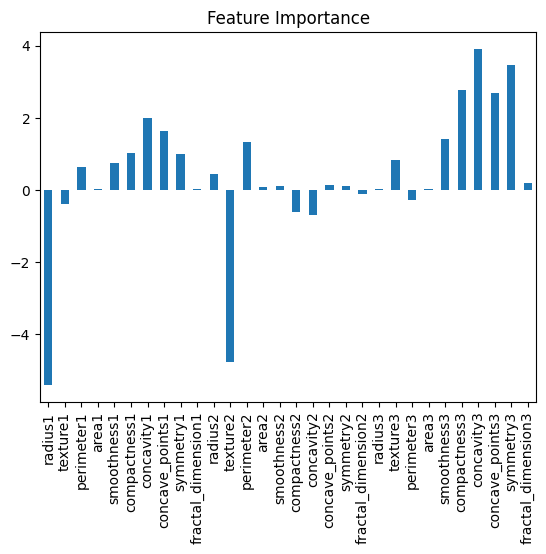

In [56]:
feature_bc = pd.DataFrame(feature_dict, index = [0])
feature_bc.T.plot.bar(title = "Feature Importance", legend = False)
plt.savefig("bc4.png", dpi=300, bbox_inches='tight')  # Save first
plt.show()  # Then display it


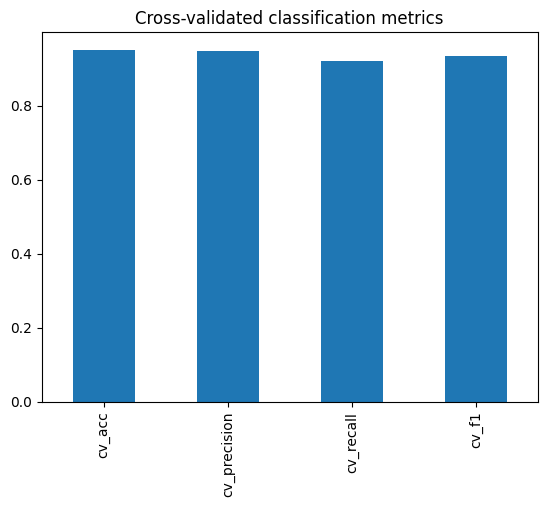

In [57]:
cv_metrics = pd.DataFrame(cross_val(clf, X, y, 5), index = [0])
cv_metrics.T.plot.bar(title = "Cross-validated classification metrics",
                      legend = False)
plt.savefig("bc5.png", dpi=300, bbox_inches='tight')  # Save first
plt.show()  # Then display it
